In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

<IPython.core.display.Javascript object>

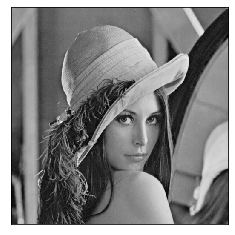

<IPython.core.display.Javascript object>

In [3]:
img = cv.imread("lena_gray.jpg", 0)
img = cv.resize(img, dsize=(512, 512)) 
width=512
height=512

plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


In [4]:
i = 0
j = 0
luv = []

for h in range(int(width / 2)):
    j = 0
    for k in range(int(height / 2)):

        luv.append([img[i, j], img[i + 1, j], img[i, j + 1], img[i + 1, j + 1]])

        j = j + 2

    i = i + 2

<IPython.core.display.Javascript object>

In [5]:
import time as t

clusterssize = [20]  # 2, 3, 4, 5, 6, 7, 8, 9,
timearray = []
error = []
segementedImg = []

<IPython.core.display.Javascript object>

In [6]:
for i in clusterssize:

    start = t.time()
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=50).fit(luv)
    timearray.append(t.time() - start)
    segementedImg.append(kmeans.labels_)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]

<IPython.core.display.Javascript object>

In [7]:
centersp = (kmeans.cluster_centers_[kmeans.labels_]).reshape(
    int(width / 2), int(height / 2), 4
)

<IPython.core.display.Javascript object>

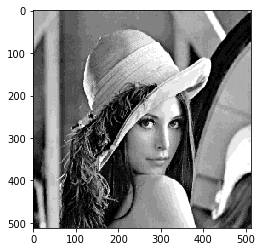

<IPython.core.display.Javascript object>

In [8]:
# convert back the clustered image to the original form
# decoding

temp = np.zeros((width, height))
i = 0
j = 0
for h in range(int(width / 2)):
    j = 0
    for k in range(int(height / 2)):
        val = centersp

        temp[i, j] = val[h][k][0]
        temp[i + 1, j] = val[h][k][1]
        temp[i, j + 1] = val[h][k][2]
        temp[i + 1, j + 1] = val[h][k][3]

        j = j + 2
    i = i + 2

plt.imshow(temp, cmap="gray")

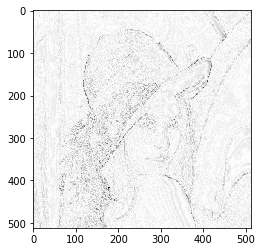

<IPython.core.display.Javascript object>

In [13]:
plt.imshow(256-abs(img - temp), cmap="gray")


In [10]:
import math


def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

<IPython.core.display.Javascript object>

In [11]:
psnr(img, temp)

31.616857285937602

<IPython.core.display.Javascript object>

In [20]:
psnr = cv.PSNR(np.array(img).astype(int), np.array(temp).astype(int))
psnr

31.58935646466346

<IPython.core.display.Javascript object>

In [24]:
def mse(vref, vcmp):
    """
    Compute Mean Squared Error (MSE) between two images.

    Parameters
    ----------
    vref : array_like
      Reference image
    vcmp : array_like
      Comparison image

    Returns
    -------
    x : float
      MSE between `vref` and `vcmp`
    """

    r = np.asarray(vref, dtype=np.float64).ravel()
    c = np.asarray(vcmp, dtype=np.float64).ravel()
    return np.mean(np.abs(r - c)**2)

def snr(vref, vcmp):
    """
    Compute Signal to Noise Ratio (SNR) of two images.

    Parameters
    ----------
    vref : array_like
      Reference image
    vcmp : array_like
      Comparison image

    Returns
    -------
    x : float
      SNR of `vcmp` with respect to `vref`
    """

    dv = np.var(vref)
    with np.errstate(divide='ignore'):
        rt = dv / mse(vref, vcmp)
    return 10.0 * np.log10(rt)




def psnr(vref, vcmp, rng=None):
    """
    Compute Peak Signal to Noise Ratio (PSNR) of two images. The PSNR
    calculation defaults to using the less common definition in terms
    of the actual range (i.e. max minus min) of the reference signal
    instead of the maximum possible range for the data type
    (i.e. :math:`2^b-1` for a :math:`b` bit representation).

    Parameters
    ----------
    vref : array_like
      Reference image
    vcmp : array_like
      Comparison image
    rng : None or int, optional (default None)
      Signal range, either the value to use (e.g. 255 for 8 bit samples) or
      None, in which case the actual range of the reference signal is used

    Returns
    -------
    x : float
      PSNR of `vcmp` with respect to `vref`
    """

    if rng is None:
        rng = vref.max() - vref.min()
    dv = (rng + 0.0)**2
    with np.errstate(divide='ignore'):
        rt = dv / mse(vref, vcmp)
    return 10.0 * np.log10(rt)




<IPython.core.display.Javascript object>

In [25]:
psnr = psnr(np.array(img).astype(int), np.array(temp).astype(int))
psnr

30.84287000418721

<IPython.core.display.Javascript object>

In [26]:
snr = snr(np.array(img).astype(int), np.array(temp).astype(int))
psnr

30.84287000418721

<IPython.core.display.Javascript object>